# Load Data

## metadata.csv

In [8]:
import pandas as pd
metadata= pd.read_csv(fr'./LJSpeech-1.1/metadata.csv', sep= '|', 
                      header= None, names= ['id', 'text', 'norm_text'],
                      quoting= 3)
metadata

,id,text,norm_text
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
...,...,...,...
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...


In [9]:
metadata.describe()

,id,text,norm_text
count,13100,13100,13100
unique,13100,13074,13074
top,LJ001-0001,Report of the President's Commission on the As...,Report of the President's Commission on the As...
freq,1,12,12


## wav sample

just as other countries have had them for over a decade.


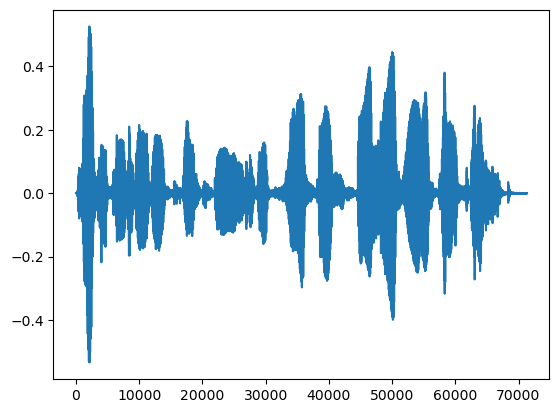

In [14]:
import random
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import Audio

idx= random.randint(0, metadata.shape[0])
id, text= metadata.iloc[idx, 0], metadata.iloc[idx, 2]
audio, fs= torchaudio.load(fr'./LJSpeech-1.1/wavs/{id}.wav')

print(text)
plt.plot(audio[0])
Audio(data= audio, rate= fs)

## spectogram

In [12]:
def plot_specgram(waveform, sample_rate, title= "Spectrogram"):
    waveform= waveform.numpy()
    num_channels, num_frames= waveform.shape
    figure, axes= plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes= [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs= sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

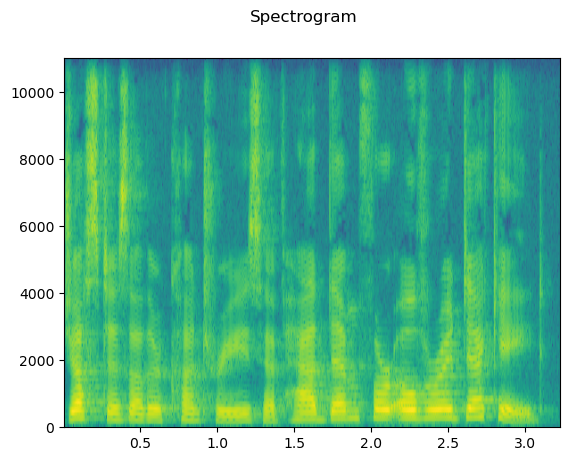

In [15]:
plot_specgram(audio, fs)